In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Project Details

## In this file task are:
- Find out most successfull consol developers based on amount of sold excusive game copies and how much does exlusives help in selling the console
- visualize the results

In [2]:
games = pd.read_csv('vgsales_cleared.csv')

In [3]:
games_copy = games.copy()
games_copy.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
1,Super Mario Bros.,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.25
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [4]:
exclusives = games_copy.drop_duplicates(subset='Name', keep= False)
exclusives.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
6,New Super Mario Bros.,7,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.02


In [5]:
exclusives.Platform.unique()

array(['Wii', 'GB', 'DS', 'NES', 'X360', 'GBA', 'PS2', '3DS', 'PS', 'PS3',
       'SNES', 'N64', 'GC', 'WiiU', 'PC', 'GEN', 'PSP', '2600', 'PS4',
       'XOne', 'XB', 'DC', 'SAT', 'PSV', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'GG', 'PCFX'], dtype=object)

In [6]:
# here we will add consoles to the lists of their developers 
nintendo = ['Wii', 'GB', 'DS', 'NES', 'GBA', '3DS', 'SNES', 'N64', 'GC', 'WiiU']
the_best = 'PC'
playstation = ['PS', 'PS2', 'PSP','PS3', 'PSV', 'PS4']
xbox = ['X360', 'XOne', 'XB']
sega = ['GEN', 'DC', 'SAT', 'SCD']

In [7]:
# adding new column
exclusives['Console_Developer'] = 'Developer'
exclusives.head()

<ipython-input-7-ef90297888ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclusives['Console_Developer'] = 'Developer'


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console_Developer
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75,Developer
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80,Developer
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Developer
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Developer
6,New Super Mario Bros.,7,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.02,Developer


In [8]:
# changing values in new column to appropriate ones
exclusives.Console_Developer.loc[exclusives.Platform == the_best] = 'PC'
exclusives.Console_Developer.loc[exclusives.Platform.isin(nintendo)] = 'Nintendo'
exclusives.Console_Developer.loc[exclusives.Platform.isin(playstation)] = 'PlayStation'
exclusives.Console_Developer.loc[exclusives.Platform.isin(xbox)] = 'Xbox'
exclusives.head()

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console_Developer
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75,Nintendo
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80,Nintendo
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,Nintendo
6,New Super Mario Bros.,7,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.02,Nintendo


In [9]:
# changing developer to others for chart
exclusives.Console_Developer.replace('Developer', 'Others', inplace=True)
exclusives.Console_Developer.value_counts()

C:\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Nintendo       3911
PlayStation    3446
Xbox            499
PC              463
Others          324
Name: Console_Developer, dtype: int64

In [10]:
# counting amount of sold coppies
ex_sales = exclusives.groupby('Console_Developer')['Global_Sales'].sum()

Text(0.5, 1.0, 'Sold exclusives per platform')

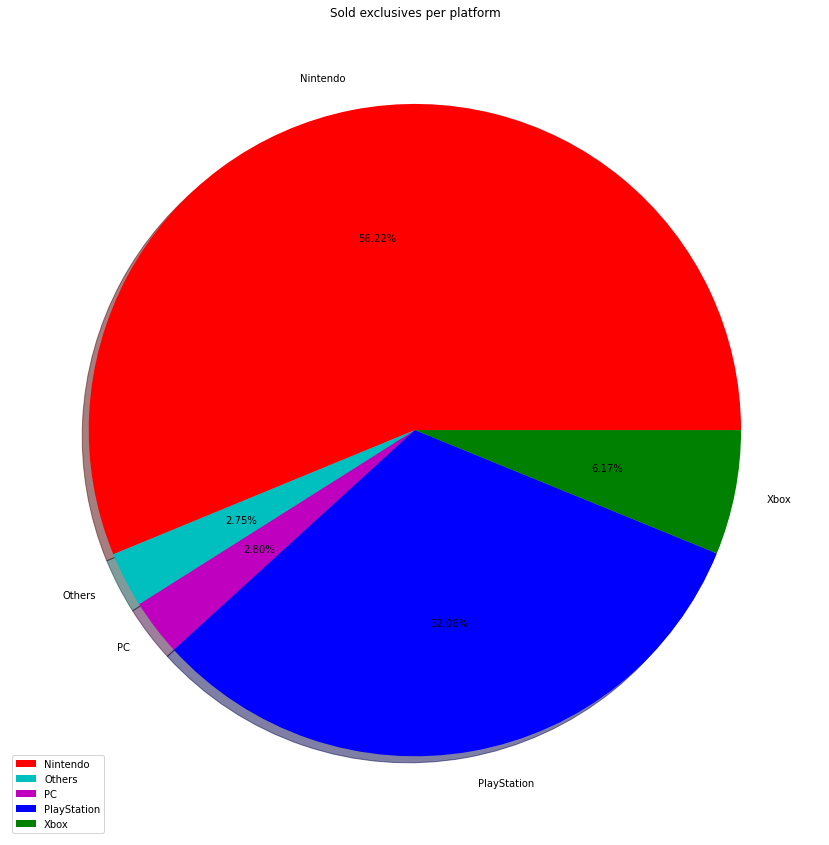

In [11]:
# creating pie chart
plt.figure(figsize=(15,15))
plt.pie(ex_sales, labels=ex_sales.index, autopct='%.2f%%', shadow = True, colors=['r', 'c', 'm', 'b', 'g'])
plt.legend()
plt.title('Sold exclusives per platform')

As we can see, Nintendo is far above competition when it comes to selling exclusives. The last thing to check is much it correlates with amount of exclusives.

In [12]:
ex_amount = exclusives.Console_Developer.value_counts()

Text(0.5, 1.0, 'Amount of exclusives per platform')

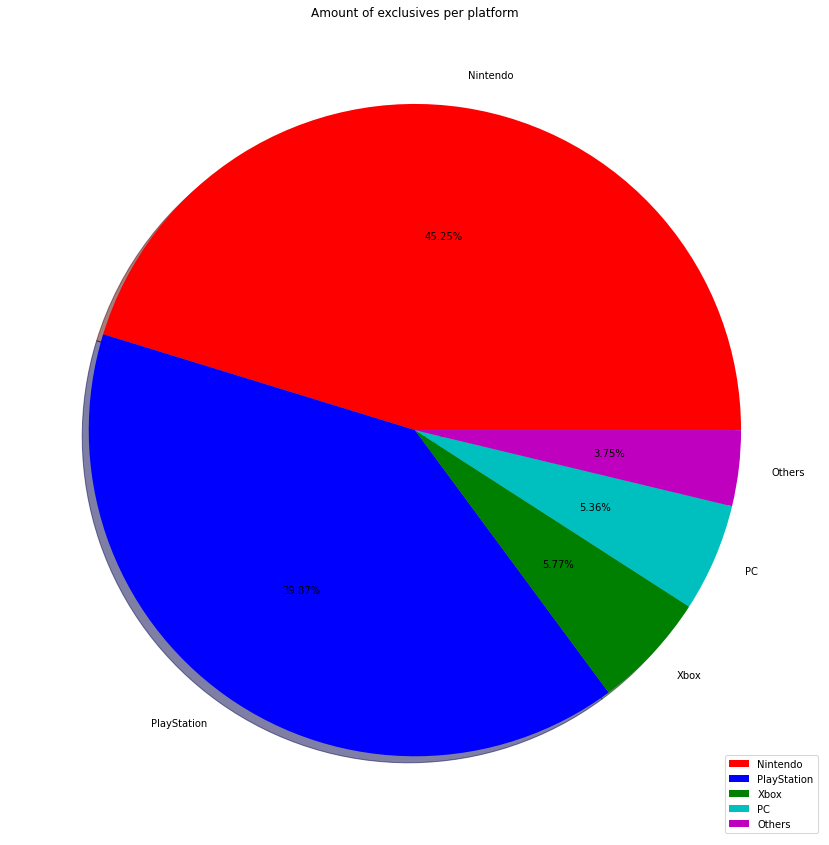

In [13]:
plt.figure(figsize=(15,15))
plt.pie(ex_amount, labels=ex_amount.index, autopct='%.2f%%', shadow = True, colors=['r', 'b', 'g', 'c', 'm'])
plt.legend()
plt.title('Amount of exclusives per platform')

The correlation is clear. However, it still can be seen that Nintendos' exclusives sold more coppies than playstation's, as procentage diffrence between these is smaller than in sales chart so the amount is not the only factor. The same happened with PC. Nonetheless, the matter is clear, Nintendo and PlayStation console sold the most consoles based on assomption that it is the only factor. To check if that the factor is the most important, we'll create another chart that will show procentage of exclusives per platform.

In [14]:
# creating multiplatform games data frame
multiplatform = games_copy.drop(exclusives.index)
multiplatform.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.25
5,Tetris,6,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.27
16,Grand Theft Auto V,17,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,Grand Theft Auto: San Andreas,18,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
18,Super Mario World,19,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


In [15]:
# again let's create a column for console developer
multiplatform['Console_Developer'] = 'Developer'
multiplatform.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console_Developer
1,Super Mario Bros.,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.25,Developer
5,Tetris,6,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.27,Developer
16,Grand Theft Auto V,17,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,Developer
17,Grand Theft Auto: San Andreas,18,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,Developer
18,Super Mario World,19,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,Developer


In [17]:
# and applying rightful developer
multiplatform.Console_Developer.loc[multiplatform.Platform == the_best] = 'PC'
multiplatform.Console_Developer.loc[multiplatform.Platform.isin(nintendo)] = 'Nintendo'
multiplatform.Console_Developer.loc[multiplatform.Platform.isin(playstation)] = 'PlayStation'
multiplatform.Console_Developer.loc[multiplatform.Platform.isin(xbox)] = 'Xbox'
multiplatform.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console_Developer
1,Super Mario Bros.,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.25,Nintendo
5,Tetris,6,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.27,Nintendo
16,Grand Theft Auto V,17,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,PlayStation
17,Grand Theft Auto: San Andreas,18,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,PlayStation
18,Super Mario World,19,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,Nintendo
